# Imports

In [1]:
import pymysql
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# from dotenv import load_dotenv
# from os import getenv

In [2]:
# load_dotenv(dotenv_path='.env')

# #change db to grocery_db, telcomarketing, insurance
# conn=pymysql.connect(host=getenv('HOST'),
#                      port=int(getenv('PORT')),
#                      user=getenv('DBUSER'),
#                      passwd=getenv('DBPASSWORD'),
#                      db='sakila')

# df= pd.read_sql("SELECT * FROM actor LIMIT 10",conn)
# df.head()

# #closes the connection with the server
# conn.close()
# df.to_csv('telco_data.csv', index=False)

In [4]:
df = pd.read_csv('telco_data.csv')

# Exploratory Data Analysis

In [5]:
df

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7            

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [9]:
df_dupe = df[df.duplicated(keep="last")]
df_dupe

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

In [10]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [11]:
numerical_columns=['Account length',#discrete
           'Total day minutes',#continuous
           'Total day calls',#discrete
           'Total day charge',#continuous
           'Total eve minutes',#continuous
           'Total eve calls',#discrete
           'Total eve charge',#continuous
           'Total night minutes',#continuous
           'Total night calls',#discrete
           'Total night charge',#continuous
           'Total intl minutes',#continuous
           'Total intl calls',#discrete
           'Total intl charge',#contiuous
           'Number vmail messages', #discrete
           'Customer service calls' #discrete
          ]

categorical_columns=['State',#nominal
             'Area code', #nominal
             'International plan', #nominal
             'Voice mail plan', #nominal
            ]

target_column=['Churn'] #nominal

In [12]:
df_true=df[df['Churn']==True]

In [13]:
df_true

State  Account length  Area code International plan Voice mail plan  \
18      CO              77        408                 No              No   
28      AZ              12        408                 No              No   
35      MD             135        408                Yes             Yes   
45      WY              87        415                 No              No   
48      CO             121        408                 No             Yes   
...    ...             ...        ...                ...             ...   
3272    CO             130        408                 No              No   
3281    MT             100        415                 No              No   
3318    WA              84        415                 No              No   
3319    MD             133        510                 No              No   
3327    CA              84        415                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
18                        0               62.4               89   
28                        0              249.6              118   
35                       41              173.1               85   
45                        0              151.0               83   
48                       30              198.4              129   
...                     ...                ...              ...   
3272                      0              271.8              129   
3281                      0              113.3               96   
3318                      0              289.1              100   
3319                      0              295.0              141   
3327                      0              280.0              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
18               10.61              169.9              121             14.44   
28               42.43              252.4              119             21.45   
35               29.43              203.9              107             17.33   
45               25.67              219.7              116             18.67   
48               33.73               75.3               77              6.40   
...                ...                ...              ...               ...   
3272             46.21              237.2              128             20.16   
3281             19.26              197.9               89             16.82   
3318             49.15              233.8               97             19.87   
3319             50.15              223.6              101             19.01   
3327             47.60              202.2               90             17.19   

      Total night minutes  Total night calls  Total night charge  \
18                  209.6                 64                9.43   
28                  280.2                 90               12.61   
35                  122.2                 78                5.50   
45                  203.9                127                9.18   
48                  181.2                 77                8.15   
...                   ...                ...                 ...   
3272                210.1                 91                9.45   
3281                284.5                 93               12.80   
3318                223.5                148               10.06   
3319                229.4                109               10.32   
3327                156.8                103                7.06   

      Total intl minutes  Total intl calls  Total intl charge  \
18                   5.7                 6               1.54   
28                  11.8                 3               3.19   
35                  14.6                15               3.94   
45                   9.7                 3               2.62   
48                   5.8                 3               1.57   
...                  ...               ...                ...   
3272                 8.7                 2            

## Functions

In [14]:
def categorical(column):
    
    plt.figure(figsize=(12,8))
    ax=sns.countplot(df[column], data=df, color='dimgray')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        x=(p.get_height()/len(df[column]))*100
        ax.annotate((round(x,2)), (p.get_x(), p.get_height()))
    plt.xlabel(column)
    plt.ylabel('Total count')
    plt.title(column)
    print(df[column].value_counts())
    
    ay=sns.countplot(x=column, data=df_true)
    ay.set_xticklabels(ay.get_xticklabels(), rotation=45)
    for p in ax.patches:
        x=(p.get_height()/len(df[column]))*100
        ay.annotate(round(x,2), (p.get_x(), p.get_height()))
    plt.show()
    return

In [15]:
def categorical_oversized(column):
    plt.figure(figsize=(12,8))
    ax=sns.countplot(df_true[column], data=df_true)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.xlabel(column)
    plt.ylabel('Total count')
    print(df_true[column].value_counts())
    return

In [16]:
def discrete(column):
    return

In [17]:
def continuous(column):
    fig, axs = plt.subplots(1,2,figsize=(15,12))
    plt.title(column)
      
    sns.boxplot(data=df_true,y=column,ax=axs[0])
    sns.distplot(df_true[column],bins=10,ax=axs[1])
    
    print(df_true[column].describe())
    return

## Churn

In [18]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [18]:
df['Churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

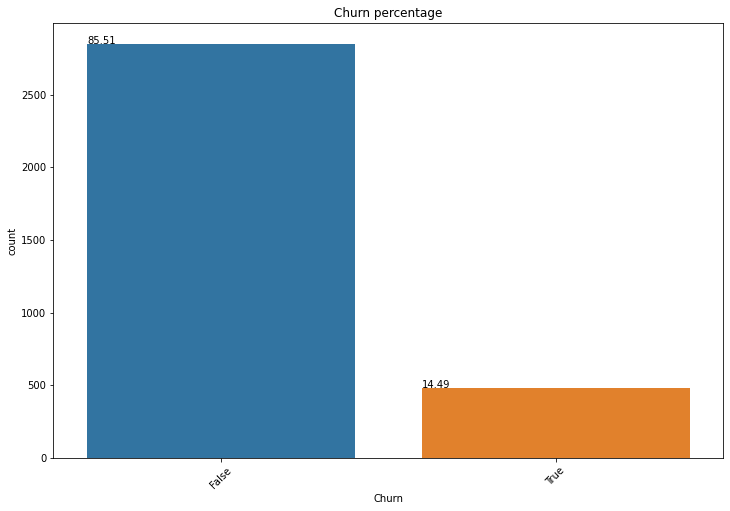

In [19]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='Churn',data=df)

for p in ax.patches:
    x=(p.get_height()/len(df['Churn']))*100
    ax.annotate((round(x,2)), (p.get_x(), p.get_height()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Churn percentage')
plt.show()

## States

NJ    18
TX    18
MD    17
MI    16
NY    15
MN    15
WA    14
MT    14
SC    14
MS    14
NV    14
ME    13
KS    13
CT    12
NC    11
OR    11
MA    11
AR    11
WV    10
OH    10
UT    10
NH     9
ID     9
CO     9
DE     9
WY     9
CA     9
IN     9
OK     9
SD     8
VT     8
AL     8
KY     8
GA     8
PA     8
FL     8
MO     7
WI     7
NM     6
RI     6
ND     6
NE     5
IL     5
DC     5
TN     5
VA     5
AZ     4
LA     4
AK     3
HI     3
IA     3
Name: State, dtype: int64


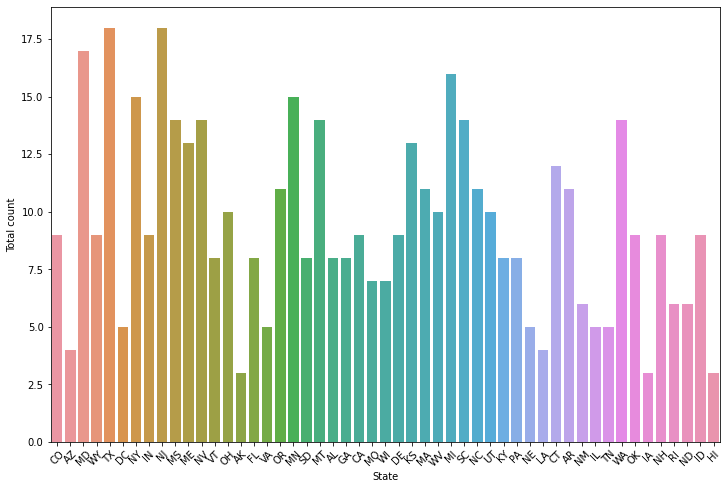

In [20]:
categorical_oversized('State')

## Area Code

415    1655
510     840
408     838
Name: Area code, dtype: int64


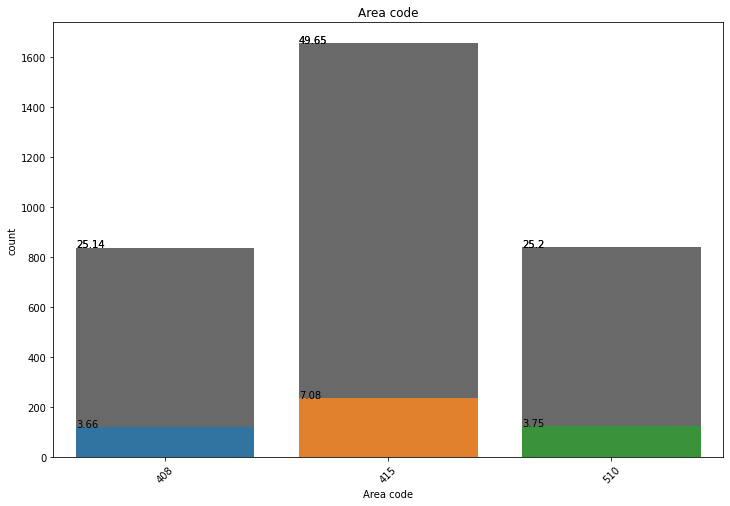

In [21]:
categorical('Area code')

## International Plan

No     3010
Yes     323
Name: International plan, dtype: int64


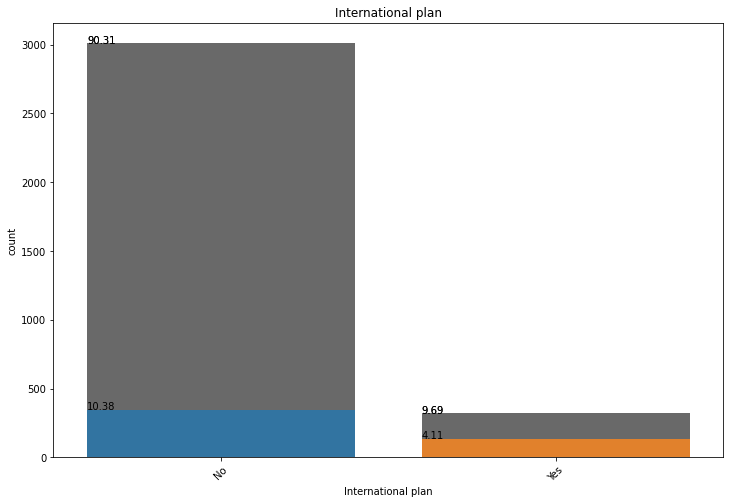

In [22]:
categorical('International plan')

## Voice Mail Plan

No     2411
Yes     922
Name: Voice mail plan, dtype: int64


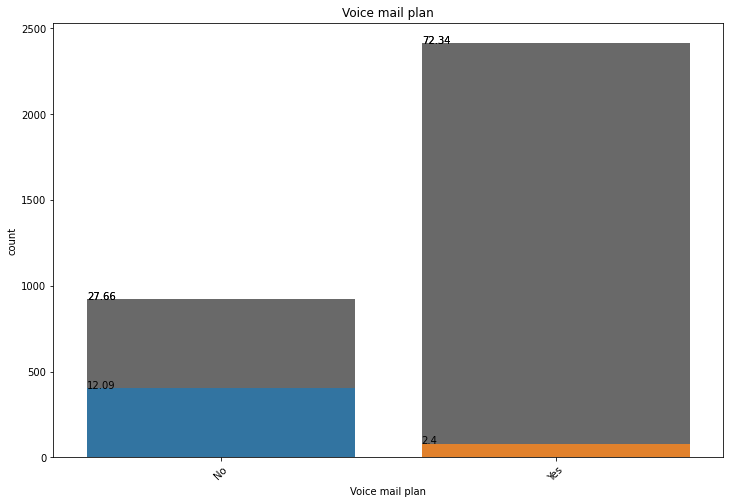

In [23]:
categorical('Voice mail plan')

## Numerical data

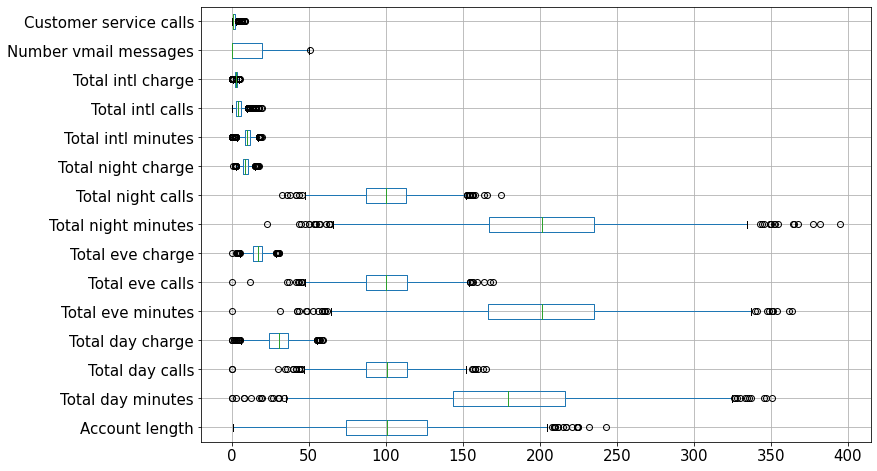

In [24]:
plt.figure(figsize=(12,8))
boxplot = df[numerical_columns].boxplot(vert=False,fontsize=15)

## Number of Voice Mail Messages

count    483.000000
mean       5.115942
std       11.860138
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       48.000000
Name: Number vmail messages, dtype: float64


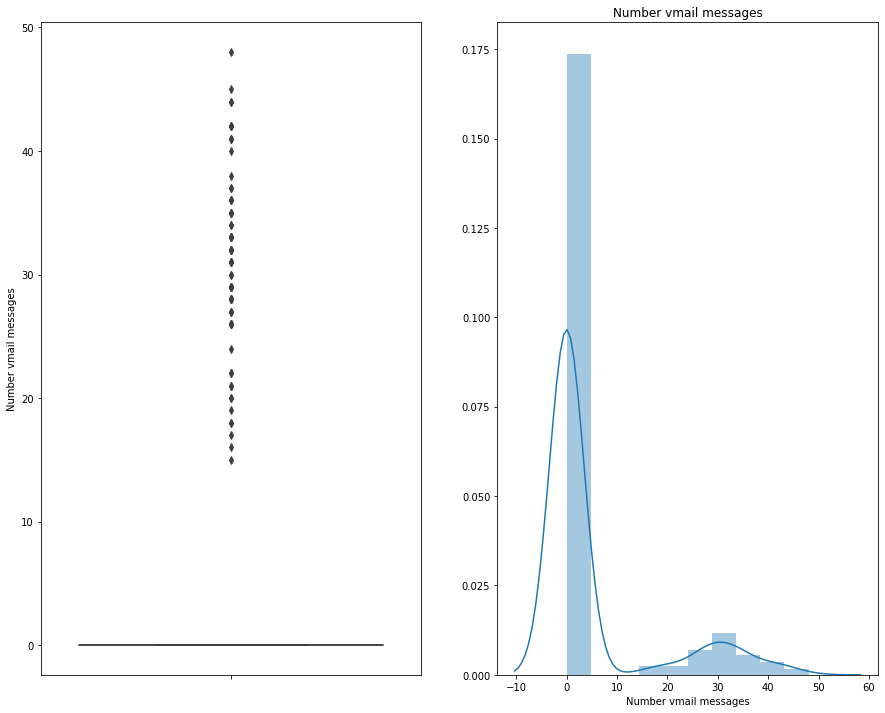

In [25]:
continuous('Number vmail messages')

## Customer Service Calls

count    483.000000
mean       2.229814
std        1.853275
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: Customer service calls, dtype: float64


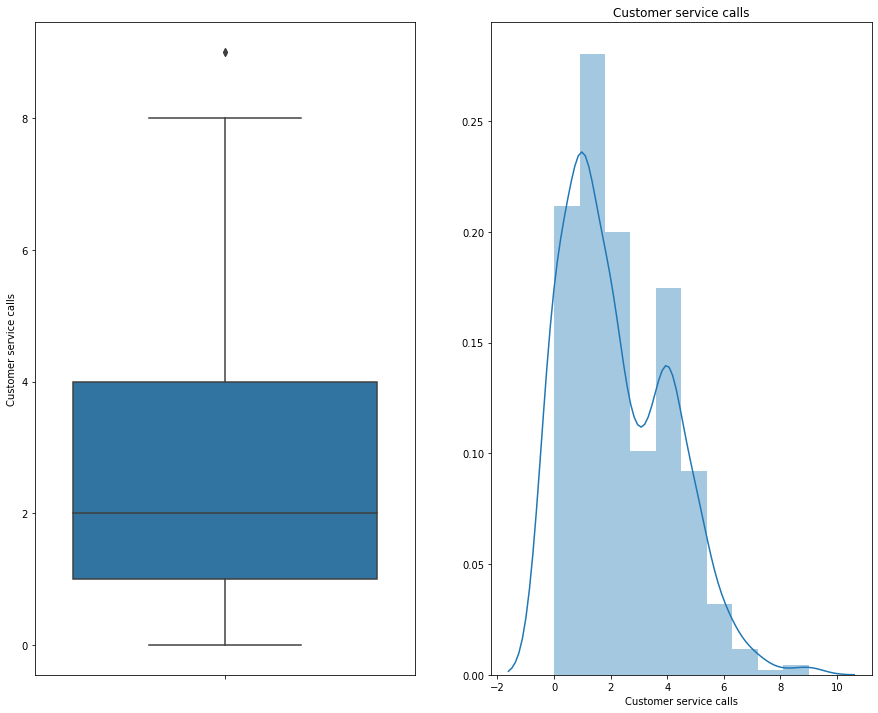

In [26]:
continuous('Customer service calls')

## Account Length (discrete)

count    483.000000
mean     102.664596
std       39.467820
min        1.000000
25%       76.000000
50%      103.000000
75%      127.000000
max      225.000000
Name: Account length, dtype: float64


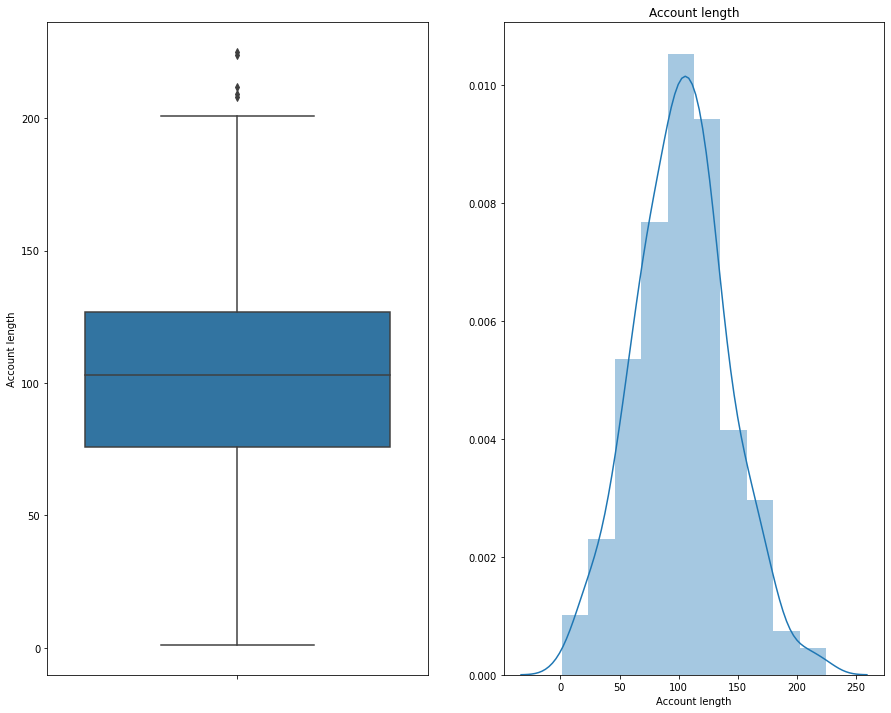

In [27]:
continuous('Account length')

## Total Day Minutes

count    483.000000
mean     206.914079
std       68.997792
min        0.000000
25%      153.250000
50%      217.600000
75%      265.950000
max      350.800000
Name: Total day minutes, dtype: float64


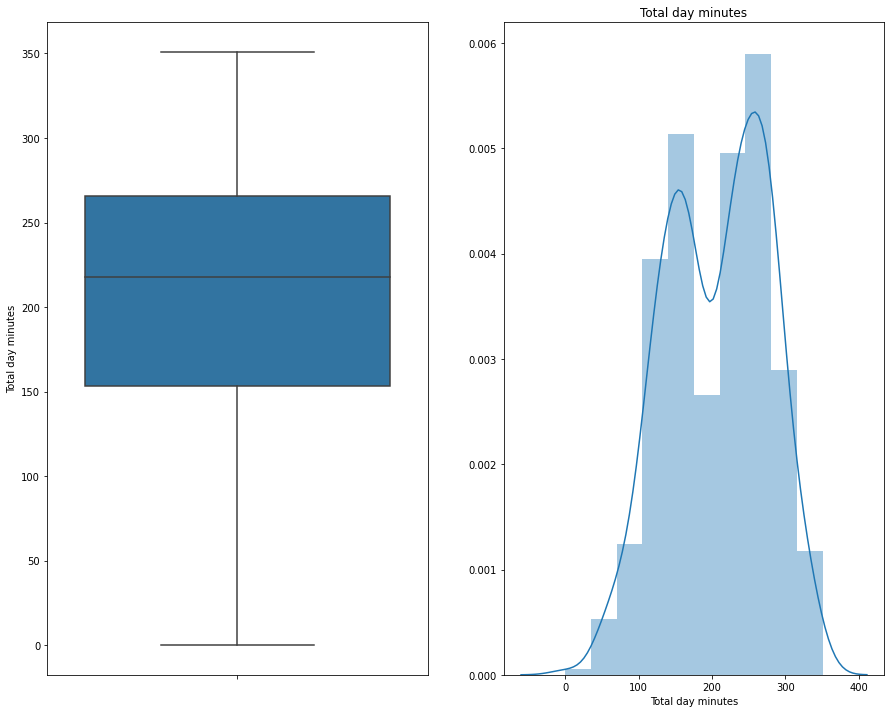

In [28]:
continuous('Total day minutes')

## Total day calls (discrete)

count    483.000000
mean     101.335404
std       21.582307
min        0.000000
25%       87.500000
50%      103.000000
75%      116.500000
max      165.000000
Name: Total day calls, dtype: float64


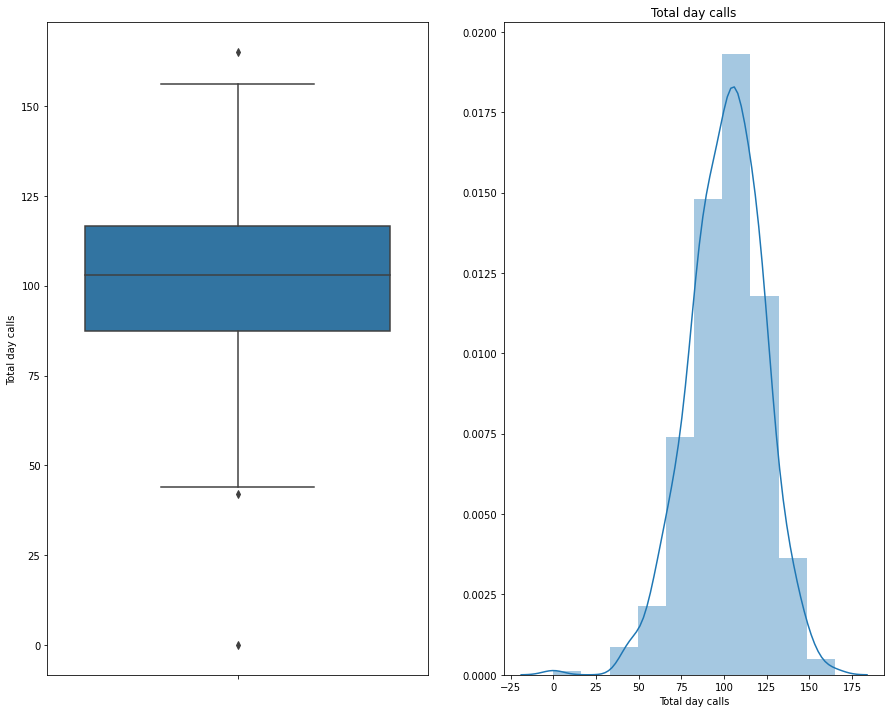

In [29]:
continuous('Total day calls')

## Total day charge

count    483.000000
mean      35.175921
std       11.729710
min        0.000000
25%       26.055000
50%       36.990000
75%       45.210000
max       59.640000
Name: Total day charge, dtype: float64


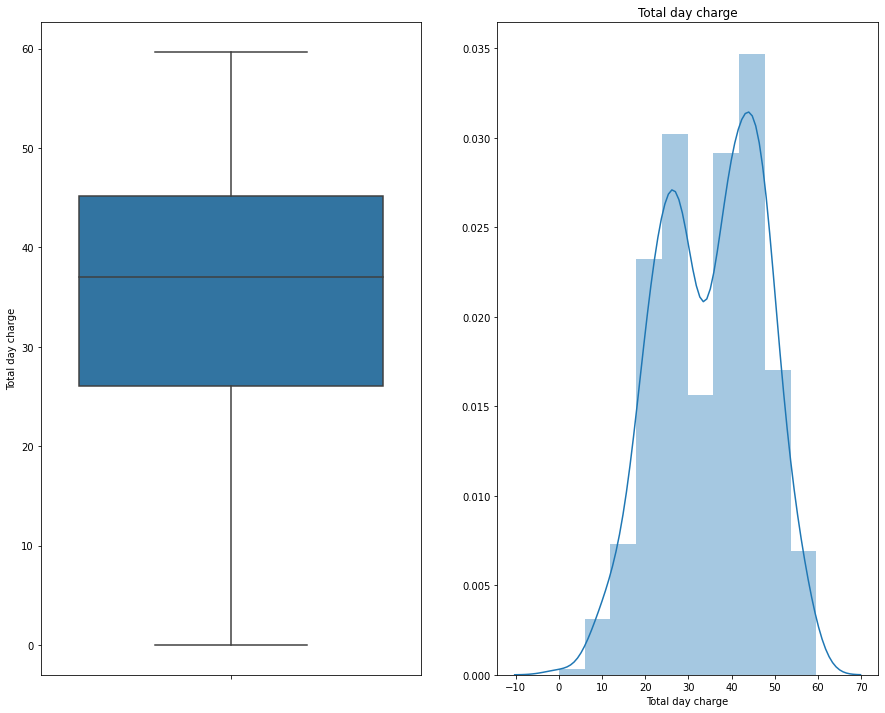

In [30]:
continuous('Total day charge')

## Total Eve minutes

count    483.000000
mean     212.410145
std       51.728910
min       70.900000
25%      177.100000
50%      211.300000
75%      249.450000
max      363.700000
Name: Total eve minutes, dtype: float64


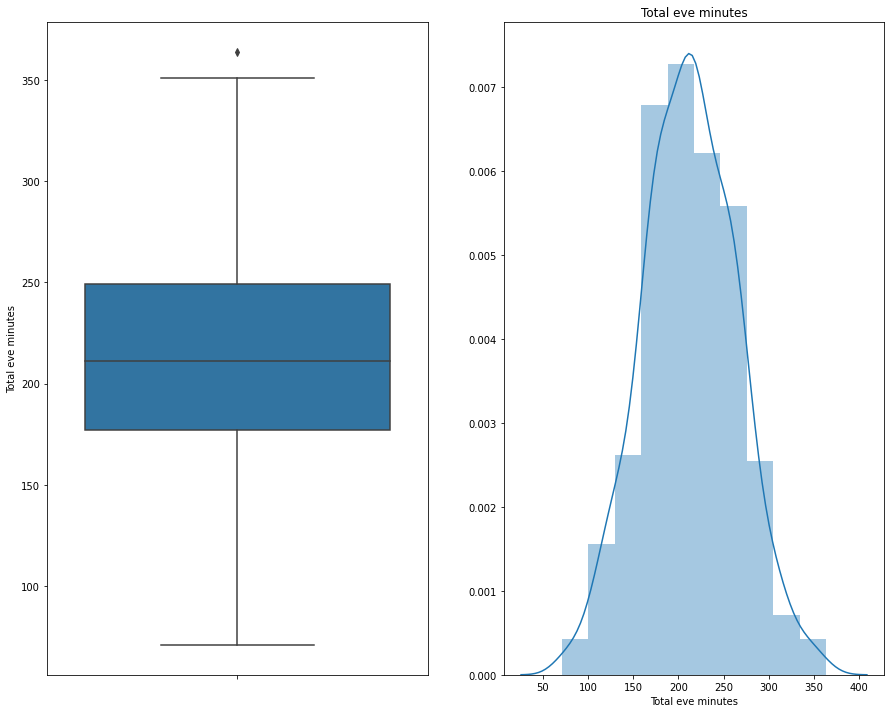

In [31]:
continuous('Total eve minutes')

## Total Eve calls (discrete)

count    483.000000
mean     100.561077
std       19.724711
min       48.000000
25%       87.000000
50%      101.000000
75%      114.000000
max      168.000000
Name: Total eve calls, dtype: float64


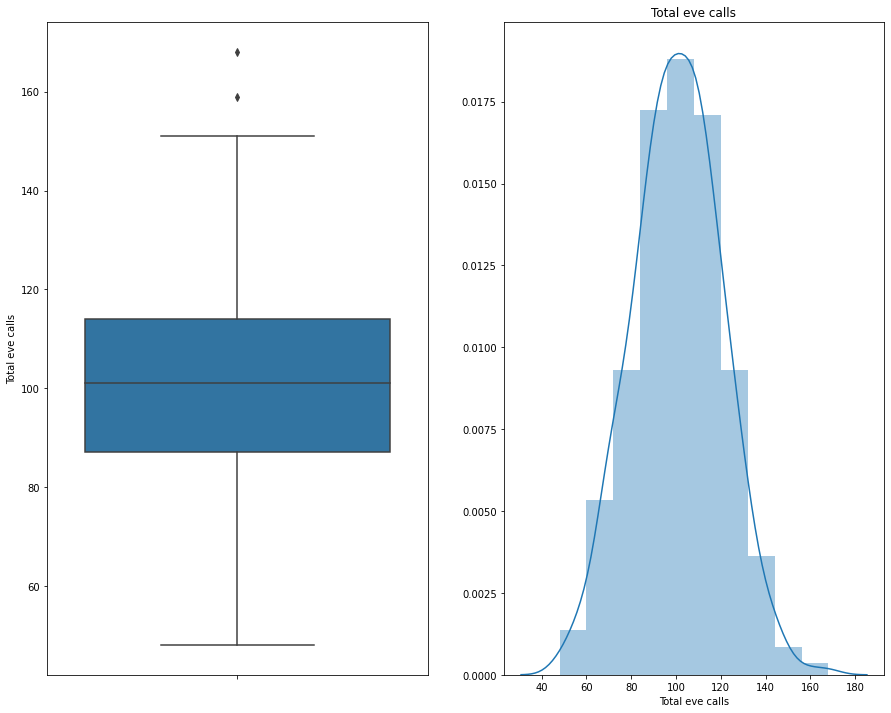

In [32]:
continuous('Total eve calls')

## Total eve charge

count    483.000000
mean      18.054969
std        4.396762
min        6.030000
25%       15.055000
50%       17.960000
75%       21.205000
max       30.910000
Name: Total eve charge, dtype: float64


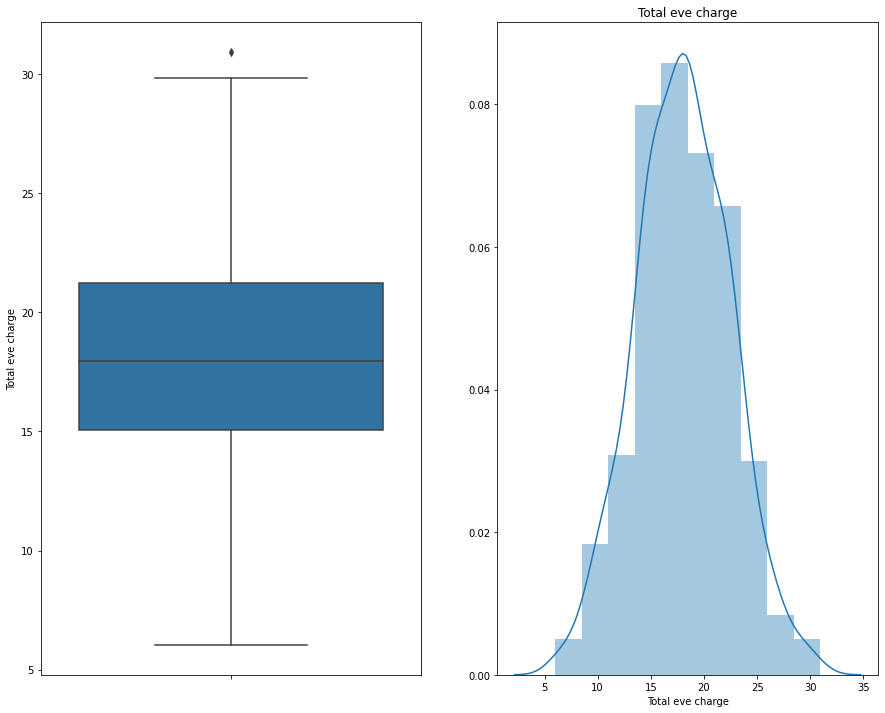

In [33]:
continuous('Total eve charge')

## Total night minutes

count    483.000000
mean     205.231677
std       47.132825
min       47.400000
25%      171.250000
50%      204.800000
75%      239.850000
max      354.900000
Name: Total night minutes, dtype: float64


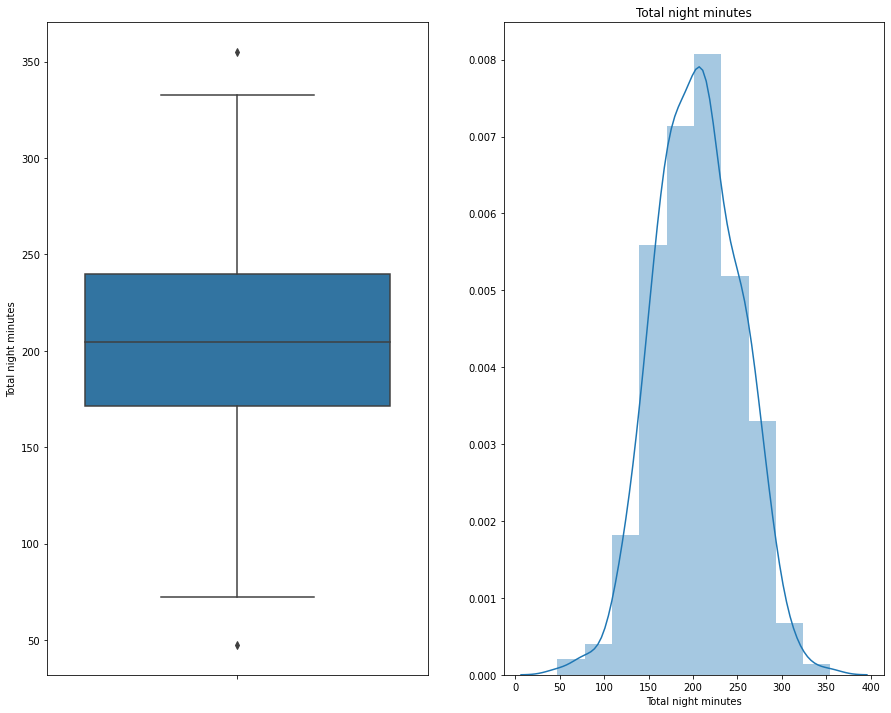

In [34]:
continuous('Total night minutes')

## Total night calls (discrete)

count    483.000000
mean     100.399586
std       19.950659
min       49.000000
25%       85.000000
50%      100.000000
75%      115.000000
max      158.000000
Name: Total night calls, dtype: float64


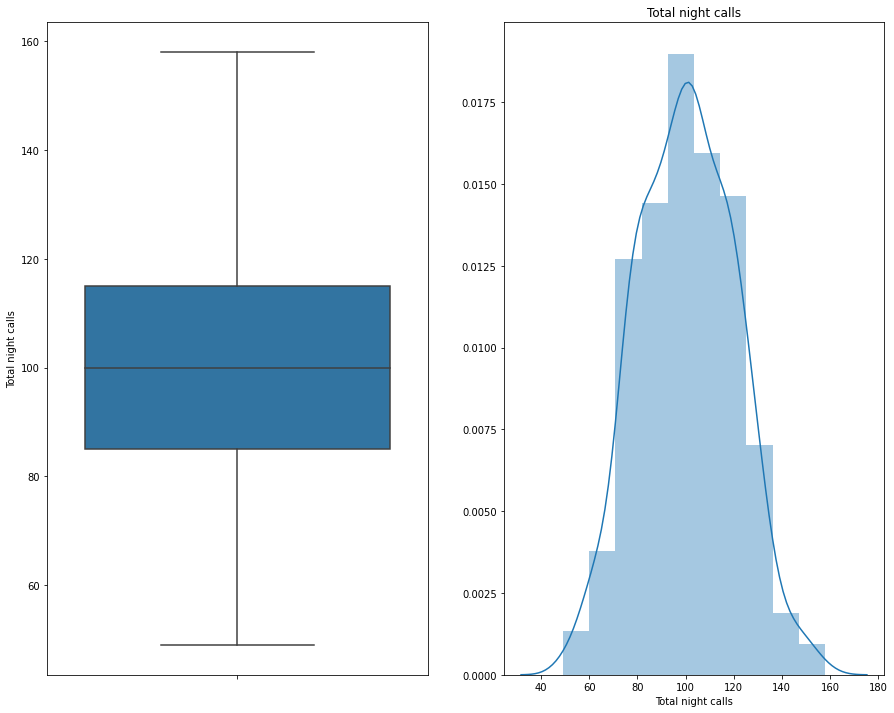

In [35]:
continuous('Total night calls')

## Total night charge

count    483.000000
mean       9.235528
std        2.121081
min        2.130000
25%        7.705000
50%        9.220000
75%       10.795000
max       15.970000
Name: Total night charge, dtype: float64


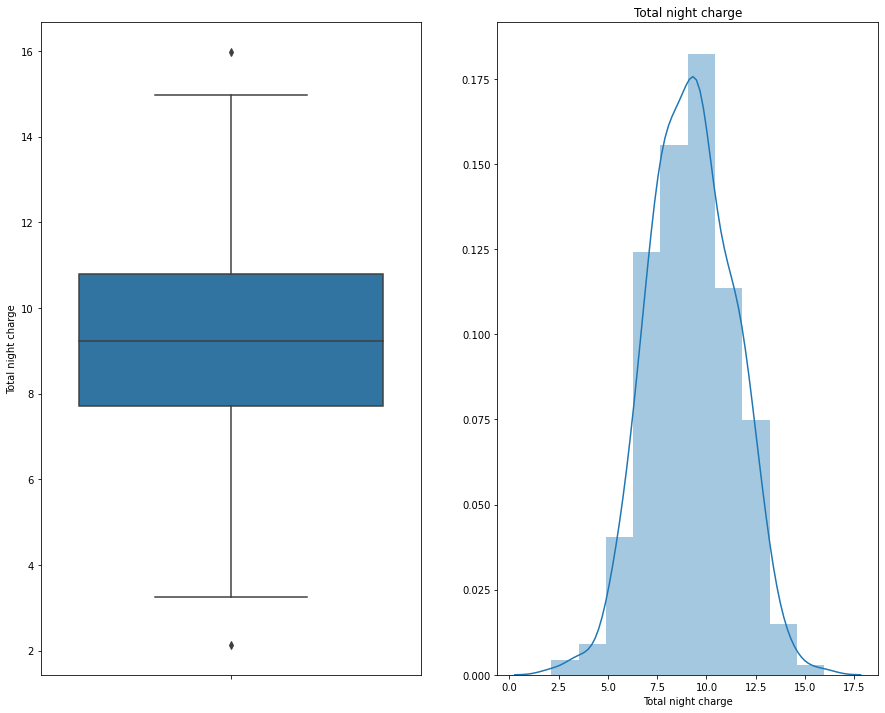

In [36]:
continuous('Total night charge')

## Total international minutes

count    483.00000
mean      10.70000
std        2.79319
min        2.00000
25%        8.80000
50%       10.60000
75%       12.80000
max       20.00000
Name: Total intl minutes, dtype: float64


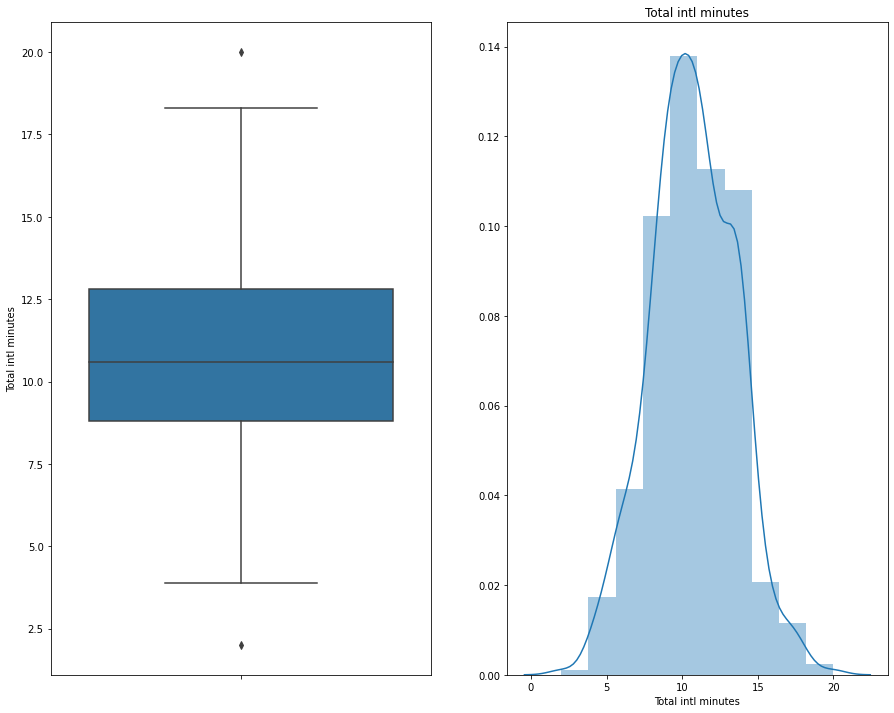

In [37]:
continuous('Total intl minutes')

## Total international calls (discrete)

count    483.000000
mean       4.163561
std        2.551575
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       20.000000
Name: Total intl calls, dtype: float64


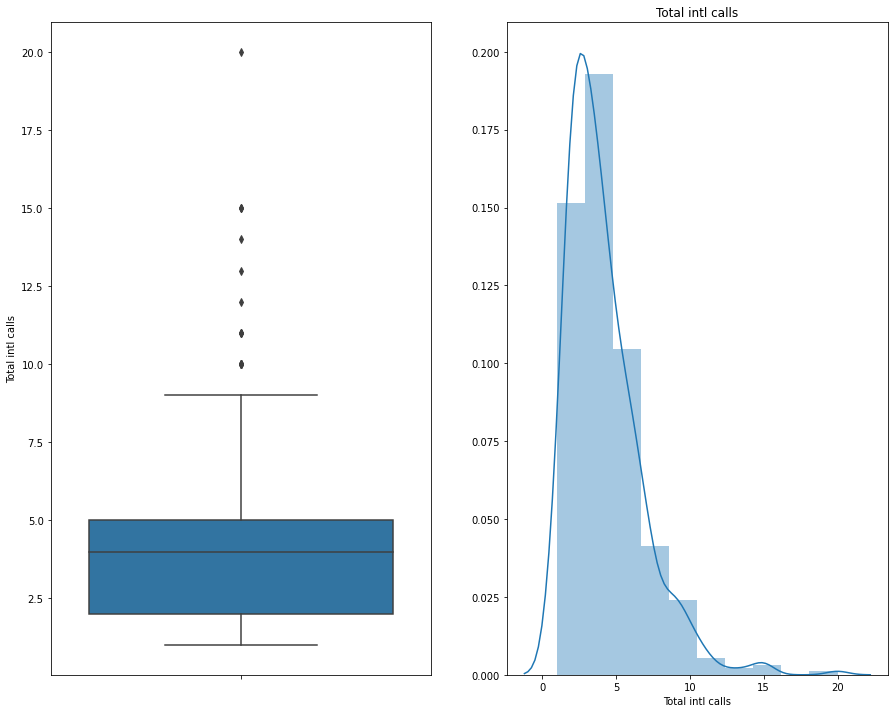

In [38]:
continuous('Total intl calls')

## Total International Charge

count    483.000000
mean       2.889545
std        0.754152
min        0.540000
25%        2.380000
50%        2.860000
75%        3.460000
max        5.400000
Name: Total intl charge, dtype: float64


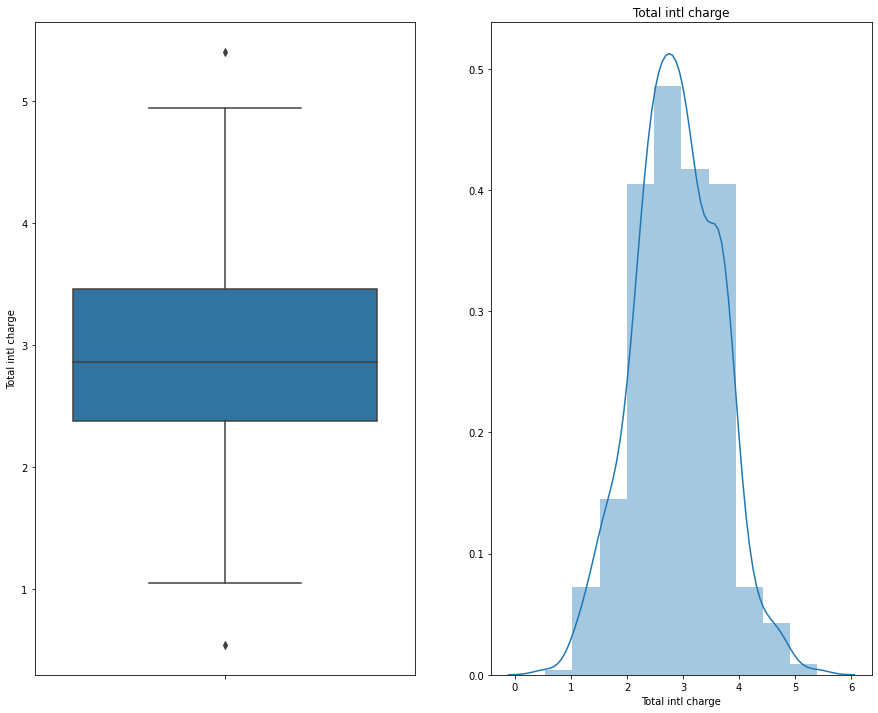

In [39]:
continuous('Total intl charge')

## Correlation Heatmap

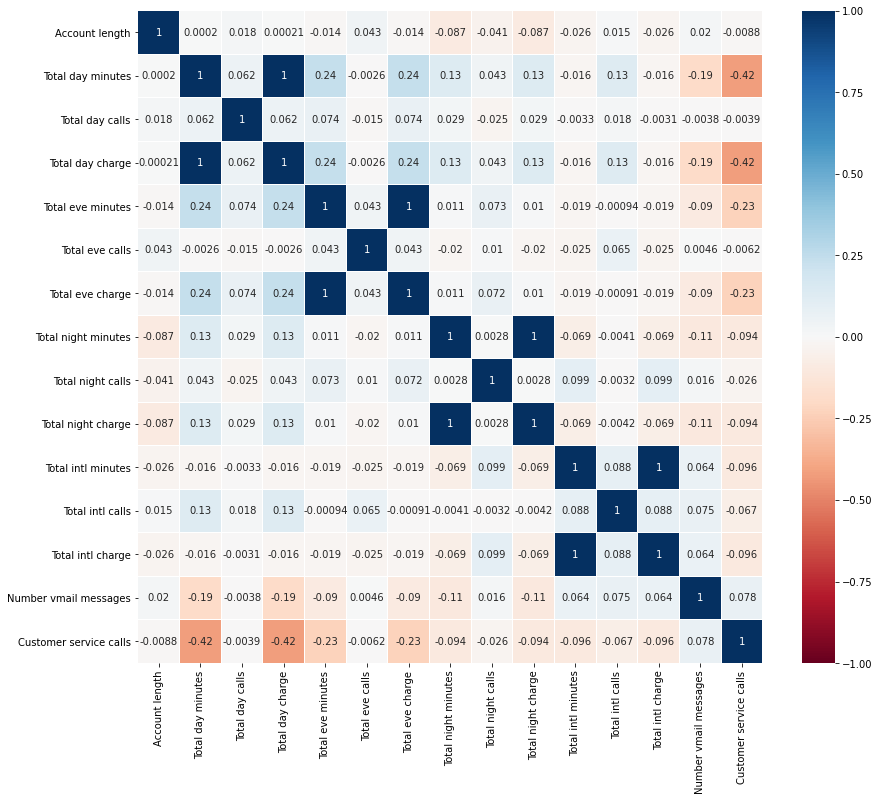

In [40]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(df_true[numerical_columns].corr(),linewidths=.1,cmap="RdBu", annot=True,vmin=-1)

plt.yticks(rotation=0);


## Pair Plots

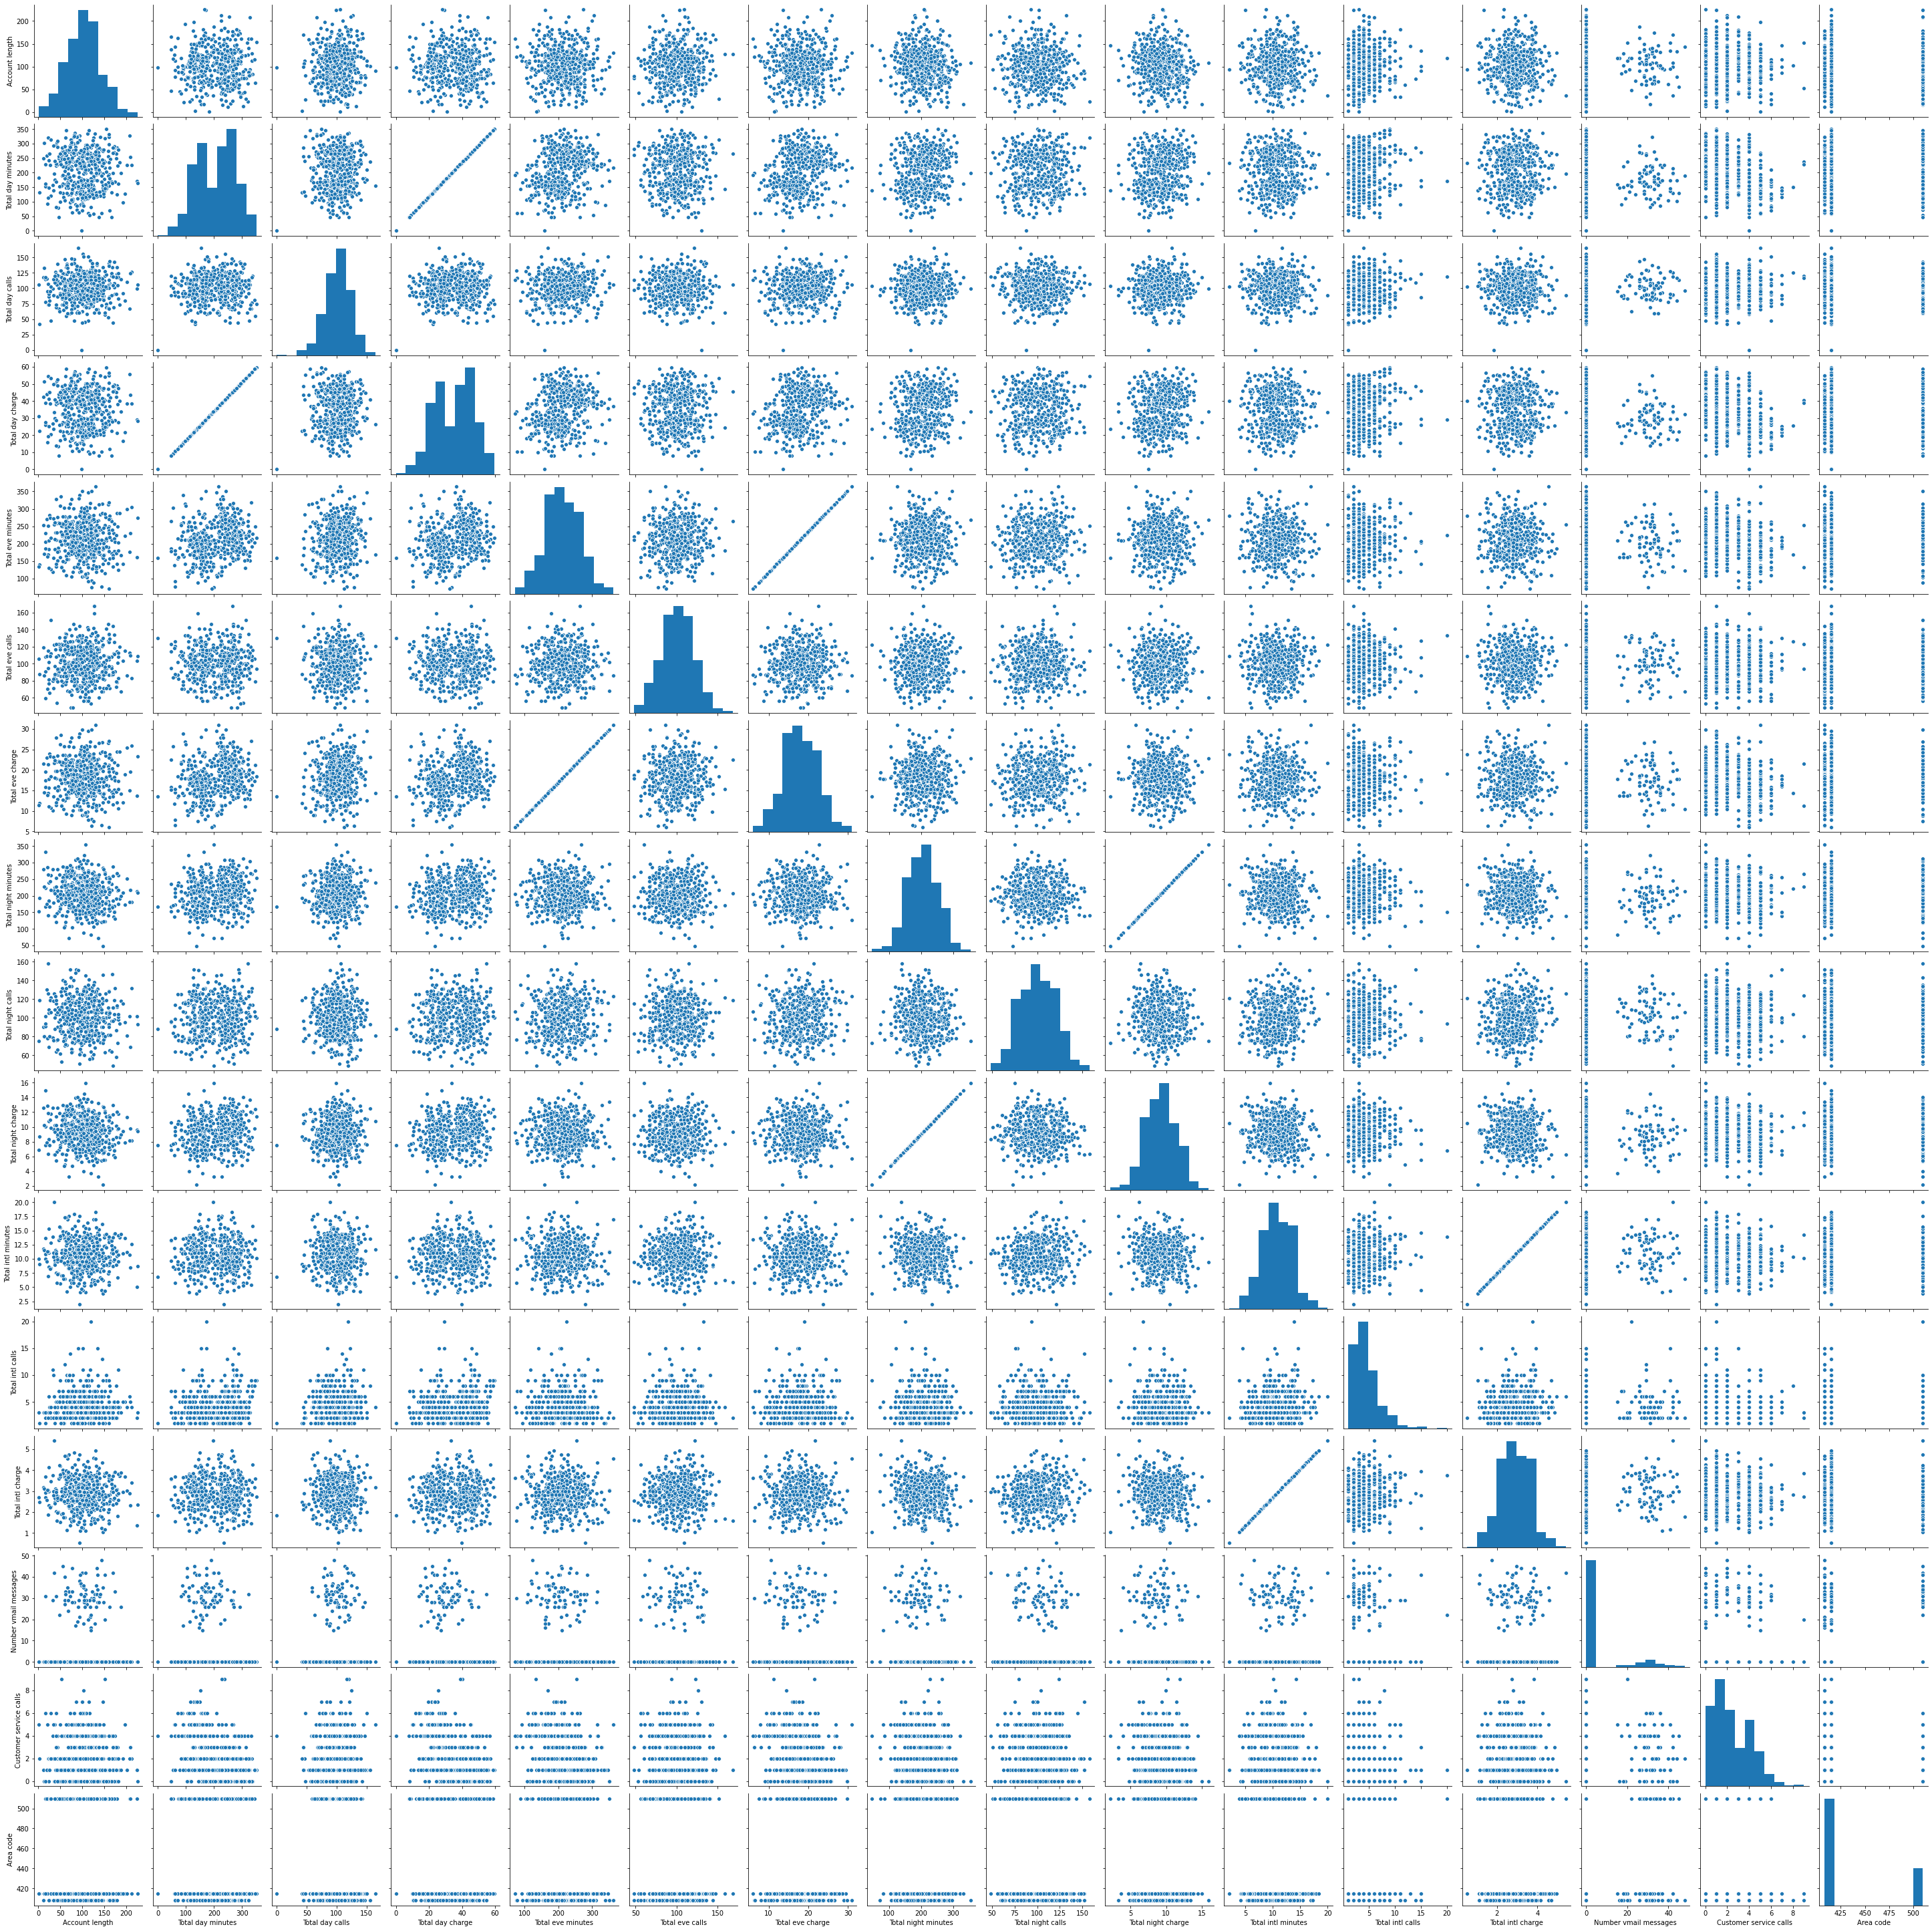

In [41]:
sns.pairplot(df_true[numerical_columns + categorical_columns])

## Data Processing

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

In [90]:
numerical_columns=['Account length',#discrete
           'Total day minutes',#continuous
           'Total day calls',#discrete
           'Total day charge',#continuous
           'Total eve minutes',#continuous
           'Total eve calls',#discrete
           'Total eve charge',#continuous
           'Total night minutes',#continuous
           'Total night calls',#discrete
           'Total night charge',#continuous
           'Total intl minutes',#continuous
           'Total intl calls',#discrete
           'Total intl charge',#contiuous
           'Number vmail messages', #discrete
           'Customer service calls' #discrete
          ]

categorical_columns2=['State',#nominal
                      'Area code' #nominal
                    ]

categorical_columns1=['International plan', #nominal
                      'Voice mail plan' #nominal
                     ]

target_column=['Churn'] #nominal
X=df_true[numerical_columns+categorical_columns1+ categorical_columns2]

In [91]:
numeric_transformer=Pipeline(steps=[('scaler',StandardScaler())])
categorical_transfomer1=Pipeline(steps=[('onehot',OneHotEncoder(drop='first'))])
categorical_transfomer2=Pipeline(steps=[('onehot',OneHotEncoder(sparse=False))])

categorical_columns1=['International plan','Voice mail plan']
categorical_columns2=['State','Area code']

preprocessor=ColumnTransformer(transformers=[('numerical',numeric_transformer,numerical_columns),
                                             ('categorical1', categorical_transfomer1, categorical_columns1),
                                             ('categorical2', categorical_transfomer2, categorical_columns2)
                                            ])

In [92]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Account length', 'Total day minutes',
                                  'Total day calls', 'Total day charge',
                                  'Total eve minutes', 'Total eve calls',
                                  'Total eve charge', 'Total night minutes',
                                  'Total night calls', 'Total night charge',
                                  'Total intl minutes', 'Total intl calls',
                                  'Total intl charge', 'Number vmail messages',
                                  'Customer service calls']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['International plan', 'Voice mail plan']),
             

In [93]:
df_pca_pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                             ('pca',PCA(n_components=0.8))])
df_pca_pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Account length',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                         

In [94]:
df_pca_pipeline[-1].explained_variance_ratio_

array([0.17164253, 0.12845331, 0.11353121, 0.09016956, 0.06712865,
       0.06140545, 0.06069033, 0.05668544, 0.05581283])

In [95]:
def scree_plot(pca_object):
    assert isinstance(pca_object,PCA), "not pca object"
    ratio=pca_object.explained_variance_ratio_
    
    plt.figure(figsize=(12,8))
    x_value=['PC'+ str(number) for number in range(1, pca_object.n_components_+1)] 
    y_value=(100*ratio).round(1)
    
    plt.bar(x_value, y_value)

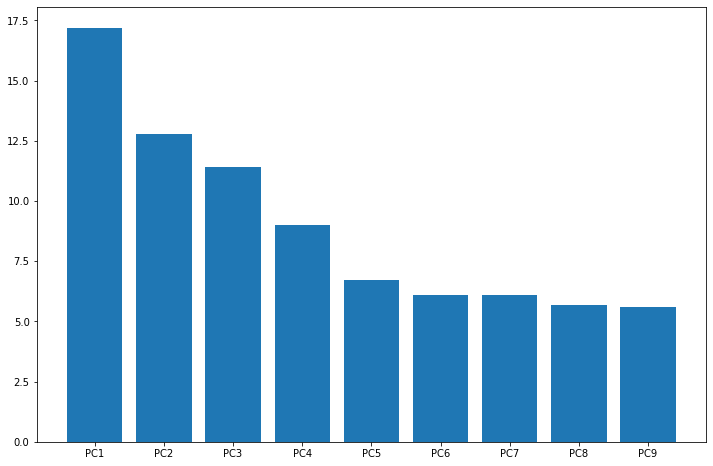

In [96]:
scree_plot(df_pca_pipeline[-1])

In [97]:
df_pca_pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                             ('pca',PCA(n_components=.8))])
df_pca_pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Account length',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                         

In [98]:
df_pca_pipeline[-1].singular_values_

array([37.48485632, 32.42769229, 30.48604073, 27.16898292, 23.4421446 ,
       22.42058083, 22.28964466, 21.54165873, 21.37521216])

In [99]:
df_pca_pipeline[-1].components_

array([[ 2.50471596e-02, -4.78760041e-01, -6.81735344e-02,
        -4.78754220e-01, -3.73318027e-01, -1.40327263e-02,
        -3.73305335e-01, -2.22405089e-01, -4.84642165e-02,
        -2.22380530e-01,  3.82805595e-02, -6.62460127e-02,
         3.81219554e-02,  1.84258825e-01,  3.29068527e-01,
         3.27947000e-02,  6.84475628e-02,  4.20061562e-03,
         5.33419277e-04,  3.43137728e-03, -5.68715051e-04,
         2.34571820e-03,  1.09007057e-03, -2.78029568e-03,
         4.13194310e-04,  1.82743989e-03,  1.36001808e-03,
         1.21919731e-03, -2.07070559e-03, -8.31761293e-04,
         4.96955395e-03,  8.00601141e-04, -3.02652470e-03,
        -8.54194527e-04,  2.52751689e-03,  2.26752424e-03,
        -1.57689074e-03, -2.37646691e-03,  1.78064601e-03,
         3.70963342e-03,  1.76731522e-03, -4.22940140e-03,
         9.24932156e-04,  6.77976651e-03, -1.36743638e-03,
        -3.30351835e-03, -3.76475106e-03,  1.47146272e-03,
        -4.63646707e-03,  1.47622635e-03, -1.05190279e-0

In [100]:
X_scale_pca=df_pca_pipeline.transform(X)

## Kmeans

In [101]:
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)

In [102]:
kmeans_pipe=Pipeline(steps=[('preprocessor',preprocessor),
                            ('pca',PCA(n_components=.8)),
                            ('kmeans',KMeans(random_state=42,verbose=1))])

In [103]:
kmeans_pipe.fit(X)

Initialization complete
Iteration 0, inertia 5555.176783120297
Iteration 1, inertia 4416.378999750628
Iteration 2, inertia 4242.207829087486
Iteration 3, inertia 4184.191749511432
Iteration 4, inertia 4166.41593678637
Iteration 5, inertia 4154.732367508182
Iteration 6, inertia 4145.856620493539
Iteration 7, inertia 4127.176307357331
Iteration 8, inertia 4116.575791234578
Iteration 9, inertia 4111.2991165334815
Iteration 10, inertia 4105.126787641511
Iteration 11, inertia 4100.297952004512
Iteration 12, inertia 4089.3151456888477
Iteration 13, inertia 4079.7040799702786
Iteration 14, inertia 4074.2019335797318
Iteration 15, inertia 4068.601499329481
Iteration 16, inertia 4061.348612557452
Iteration 17, inertia 4051.365589755195
Iteration 18, inertia 4049.5111228703117
Iteration 19, inertia 4046.2084554754715
Iteration 20, inertia 4041.3025206260922
Iteration 21, inertia 4035.212761908536
Iteration 22, inertia 4032.247110590351
Iteration 23, inertia 4028.9070880278664
Iteration 24, inert

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Account length',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                         

In [104]:
inertia_list = []
for i in range(1,20):
    kmeans_pipe_xy = Pipeline(steps = [('preprocessor',preprocessor),
                                       ('pca',PCA(n_components=.8)),
                                       ('kmeans',KMeans(random_state = 42,
                                                  n_clusters = i))])
    kmeans_pipe_xy.fit(X)
    inertia_list.append(kmeans_pipe_xy.named_steps['kmeans'].inertia_)
inertia_list

[6594.209595837674,
 5495.495547773393,
 5037.17594330285,
 4700.917099004897,
 4483.686123167054,
 4258.102572111238,
 4119.199120296084,
 3955.5207461857476,
 3827.0812642820424,
 3696.9474495792742,
 3637.7413435896456,
 3543.2096234603755,
 3468.122528324502,
 3406.721345328817,
 3335.037109697439,
 3256.761927364122,
 3194.827639110243,
 3163.487112502147,
 3079.6270753117537]

In [105]:
kmeans_pca_pipe_final = Pipeline(steps = [('preprocessor',preprocessor),
                                          ('pca',PCA(n_components=.8)),
                                          ('kmeans',KMeans(n_clusters=3, random_state=42))])

In [106]:
kmeans_pca_pipe_final.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Account length',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                         

In [107]:
kmeans_pca_pipe_final.named_steps['kmeans'].labels_

array([2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0,
       2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2,
       2, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2,
       0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1,
       1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

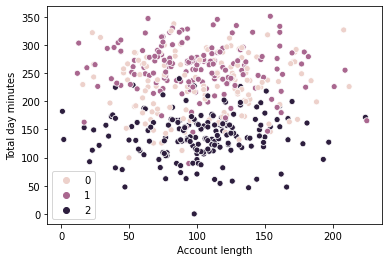

In [108]:
sns.scatterplot(X.iloc[:,0],X.iloc[:,1], hue =kmeans_pca_pipe_final.named_steps['kmeans'].labels_)


In [109]:
df_true['kmeans_labels']=kmeans_pca_pipe_final.named_steps['kmeans'].labels_
df_true.head()

/home/gamma/Desktop/unit3_project/unit3_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


State  Account length  Area code International plan Voice mail plan  \
18    CO              77        408                 No              No   
28    AZ              12        408                 No              No   
35    MD             135        408                Yes             Yes   
45    WY              87        415                 No              No   
48    CO             121        408                 No             Yes   

    Number vmail messages  Total day minutes  Total day calls  \
18                      0               62.4               89   
28                      0              249.6              118   
35                     41              173.1               85   
45                      0              151.0               83   
48                     30              198.4              129   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
18             10.61              169.9              121             14.44   
28             42.43              252.4              119             21.45   
35             29.43              203.9              107             17.33   
45             25.67              219.7              116             18.67   
48             33.73               75.3               77              6.40   

    Total night minutes  Total night calls  Total night charge  \
18                209.6                 64                9.43   
28                280.2                 90               12.61   
35                122.2                 78                5.50   
45                203.9                127                9.18   
48                181.2                 77                8.15   

    Total intl minutes  Total intl calls  Total intl charge  \
18                 5.7                 6               1.54   
28                11.8                 3               3.19   
35                14.6                15               3.94   
45                 9.7                 3               2.62   
48                 5.8                 3               1.57   

    Customer service calls  Churn  kmeans_labels  dbscan_labels  
18                       5   True              2              0  
28                       1   True              1              0  
35                       0   True              0              0  
45                       5   True              2              0  
48                       3   True              2              0

In [110]:
#silhouette score
df_true.groupby('kmeans_labels').describe()

Account length                                                   \
                       count        mean        std   min   25%    50%    75%   
kmeans_labels                                                                   
0                      142.0  104.880282  41.348627  16.0  71.0  106.5  133.0   
1                      167.0  100.562874  39.350379  12.0  75.0   97.0  122.5   
2                      174.0  102.873563  38.110064   1.0  82.0  104.0  124.0   

                     Area code                                               \
                 max     count        mean        std    min     25%    50%   
kmeans_labels                                                                 
0              212.0     142.0  436.788732  42.114136  408.0  415.00  415.0   
1              225.0     167.0  434.730539  41.080502  408.0  408.00  415.0   
2              224.0     174.0  441.620690  44.860024  408.0  409.75  415.0   

                            Number vmail messages                            \
                 75%    max                 count      mean        std  min   
kmeans_labels                                                                 
0              415.0  510.0                 142.0  5.992958  12.221651  0.0   
1              415.0  510.0                 167.0  1.628743   7.381588  0.0   
2              510.0  510.0                 174.0  7.747126  14.090720  0.0   

                                   Total day minutes                         \
               25%  50%  75%   max             count        mean        std   
kmeans_labels                                                                 
0              0.0  0.0  0.0  44.0             142.0  230.033803  51.820752   
1              0.0  0.0  0.0  42.0             167.0  257.964072  43.554431   
2              0.0  0.0  0.0  48.0             174.0  139.050000  40.845906   

                                                     Total day calls  \
                min      25%     50%      75%    max           count   
kmeans_labels                                                          
0              99.6  190.850  236.50  270.225  337.4           142.0   
1              89.5  234.750  263.80  283.450  350.8           167.0   
2               0.0  115.025  137.95  162.375  240.0           174.0   

                                                                        \
                     mean        std   min    25%    50%    75%    max   
kmeans_labels                                                            
0              100.176056  21.214975  48.0  86.00  101.5  114.0  148.0   
1              104.526946  20.530264  44.0  92.00  105.0  118.5  156.0   
2               99.218391  22.606677   0.0  84.25  100.0  115.0  165.0   

              Total day charge                                               \
                         count       mean       std    min      25%     50%   
kmeans_labels                                                                 
0                        142.0  39.106197  8.809675  16.93  32.4475  40.205   
1                        167.0  43.854491  7.404182  15.22  39.9100  44.850   
2                        174.0  23.639023  6.944068   0.00  19.5550  23.455   

                              Total eve minutes                                \
                   75%    max             count        mean        std    min   
kmeans_labels                                                                   
0              45.9375  57.36             142.0  225.242958  43.498056  108.2   
1              48.1900  59.64             167.0  237.350898  45.300967  129.4   
2              27.6050  40.80             174.0  178.000000  44.917241   70.9   

                                              Total eve calls              \
                   25%    50%      75%    max           count        mean   
kmeans_labels                                                               
0              193.975  222.2  

1. 0
    * account length: 104.88--> longer
    * number vmail messages: 5.99
    * Total day minutes: 230.03
    * Total day calls: 100.17
    * Total day charge: 39.11
    * Total eve minutes: 225.24
    * Total eve calls: 100.26
    * Total eve charge: 19.14
    * Total night minutes: 187.47 --> lowest night calls
    * Total night calls: 107.42--> most night calls
    * Total night charge: 8.43--> lowest
    * Total international minutes: 13.27--> highest
    * Total international calls: 4.51
    * Total international charge: 3.59
    * Customer service calls: 1.45

2. 1
    * account length: 100.56--> shorter account
    * number vmail messages: 1.62--> lowest number of vmail messages
    * Total day minutes: 257.96 --> most day calls
    * Total day calls: 104.53
    * Total day charge: 43.85
    * Total eve minutes: 237.35--> most eve
    * Total eve calls: 101.15
    * Total eve charge: 20.17
    * Total night minutes: 230.81 --> most night
    * Total night calls: 96.71--> least number
    * Total night charge: 10.38
    * Total international minutes: 9.09--> lowest call by minutes
    * Total international calls: 4.31
    * Total international charge: 2.46
    * Customer service calls: 1.41

3. 2
    * account length: 102.87
    * number vmail messages: 7.75 --> largest number of vmail
    * Total day minutes: 139.05 --> lowest day calls
    * Total day calls: 99.21
    * Total day charge: 23.64
    * Total eve minutes: 178.00--> lowest
    * Total eve calls: 100.24
    * Total eve charge: 15.13
    * Total night minutes: 195.17
    * Total night calls: 98.20
    * Total night charge: 8.78
    * Total international minutes: 10.14
    * Total international calls: 3.74--> least int call
    * Total international charge: 2.74
    * Customer service calls: 3.64--> most customer service calls

In [111]:
kmeans_pca_pipe_final[-1]

KMeans(n_clusters=3, random_state=42)

In [112]:
X

Account length  Total day minutes  Total day calls  Total day charge  \
18                77               62.4               89             10.61   
28                12              249.6              118             42.43   
35               135              173.1               85             29.43   
45                87              151.0               83             25.67   
48               121              198.4              129             33.73   
...              ...                ...              ...               ...   
3272             130              271.8              129             46.21   
3281             100              113.3               96             19.26   
3318              84              289.1              100             49.15   
3319             133              295.0              141             50.15   
3327              84              280.0              113             47.60   

      Total eve minutes  Total eve calls  Total eve charge  \
18                169.9              121             14.44   
28                252.4              119             21.45   
35                203.9              107             17.33   
45                219.7              116             18.67   
48                 75.3               77              6.40   
...                 ...              ...               ...   
3272              237.2              128             20.16   
3281              197.9               89             16.82   
3318              233.8               97             19.87   
3319              223.6              101             19.01   
3327              202.2               90             17.19   

      Total night minutes  Total night calls  Total night charge  \
18                  209.6                 64                9.43   
28                  280.2                 90               12.61   
35                  122.2                 78                5.50   
45                  203.9                127                9.18   
48                  181.2                 77                8.15   
...                   ...                ...                 ...   
3272                210.1                 91                9.45   
3281                284.5                 93               12.80   
3318                223.5                148               10.06   
3319                229.4                109               10.32   
3327                156.8                103                7.06   

      Total intl minutes  Total intl calls  Total intl charge  \
18                   5.7                 6               1.54   
28                  11.8                 3               3.19   
35                  14.6                15               3.94   
45                   9.7                 3               2.62   
48                   5.8                 3               1.57   
...                  ...               ...                ...   
3272                 8.7                 2               2.35   
3281                11.7                 2               3.16   
3318                12.7                 2               3.43   
3319                12.9                 4               3.48   
3327                10.4                 4               2.81   

      Number vmail messages  Customer service calls International plan  \
18                        0                       5                 No   
28                        0                       1                 No   
35                       41                       0                Yes   
45                        0                       5                 No   
48                       30                       3                 No   
...                     ...                     ...                ...   
3272                      0                       4                 No   
3281                      0                       4                 No   
3318                      0                       2         

In [113]:
X_2=preprocessor.fit_transform(X)

In [114]:
silhouette_score(X_2, kmeans_pca_pipe_final[-1].labels_,metric='manhattan')

0.10191255016858079

## DBSCAN with euclidean

In [115]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [116]:
knn_euclidean_pipe=Pipeline([('preprocessor',preprocessor),
                             ('pca',PCA(n_components=.8)),
                             ('knn',NearestNeighbors(n_neighbors=2))])

In [117]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_2)
distances, indices = nbrs.kneighbors(X_2)

In [118]:
distances, indices = nbrs.kneighbors(X_2)

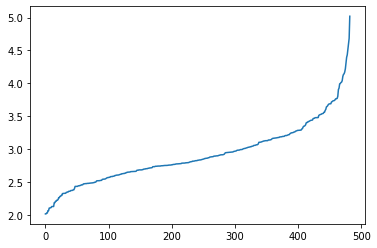

In [119]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [120]:
dbscan_pipe=Pipeline([('preprocessor',preprocessor),
                          ('pca',PCA(n_components=.8)),
                          ('dbscan',DBSCAN(eps=3.7, min_samples=3))])

In [121]:
dbscan_pipe.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Account length',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                         

In [122]:
dbscan_pipe.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['Account length', 'Total day minutes',
                                     'Total day calls', 'Total day charge',
                                     'Total eve minutes', 'Total eve calls',
                                     'Total eve charge', 'Total night minutes',
                                     'Total night calls', 'Total night charge',
                                     'Total intl minutes', 'Total intl calls',
                                     'Total intl charge', 'Number vmail messages',
                                     'Customer service calls']),
                                   ('categorical1',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(drop='first'))]),
      

In [123]:
dbscan_pipe[-1].labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [124]:
default_euclidean_labels=dbscan_pipe[-1].labels_

In [125]:
silhouette_score(X_2, dbscan_pipe[-1].labels_,metric='euclidean')

0.275059555270968

In [126]:
df_true['dbscan_labels']=dbscan_pipe[-1].labels_
df_true.head()

/home/gamma/Desktop/unit3_project/unit3_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


State  Account length  Area code International plan Voice mail plan  \
18    CO              77        408                 No              No   
28    AZ              12        408                 No              No   
35    MD             135        408                Yes             Yes   
45    WY              87        415                 No              No   
48    CO             121        408                 No             Yes   

    Number vmail messages  Total day minutes  Total day calls  \
18                      0               62.4               89   
28                      0              249.6              118   
35                     41              173.1               85   
45                      0              151.0               83   
48                     30              198.4              129   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
18             10.61              169.9              121             14.44   
28             42.43              252.4              119             21.45   
35             29.43              203.9              107             17.33   
45             25.67              219.7              116             18.67   
48             33.73               75.3               77              6.40   

    Total night minutes  Total night calls  Total night charge  \
18                209.6                 64                9.43   
28                280.2                 90               12.61   
35                122.2                 78                5.50   
45                203.9                127                9.18   
48                181.2                 77                8.15   

    Total intl minutes  Total intl calls  Total intl charge  \
18                 5.7                 6               1.54   
28                11.8                 3               3.19   
35                14.6                15               3.94   
45                 9.7                 3               2.62   
48                 5.8                 3               1.57   

    Customer service calls  Churn  kmeans_labels  dbscan_labels  
18                       5   True              2              0  
28                       1   True              1              0  
35                       0   True              0              0  
45                       5   True              2              0  
48                       3   True              2              0

In [127]:
#silhouette score
df_true.groupby('dbscan_labels').describe()

Account length                                                   \
                       count        mean        std   min   25%    50%    75%   
dbscan_labels                                                                   
-1                       4.0   86.000000  47.356802  36.0  57.0   81.0  110.0   
 0                     479.0  102.803758  39.424934   1.0  76.0  103.0  127.0   

                     Area code                                              \
                 max     count        mean        std    min    25%    50%   
dbscan_labels                                                                
-1             146.0       4.0  462.500000  54.848276  415.0  415.0  462.5   
 0             225.0     479.0  437.611691  42.690522  408.0  408.0  415.0   

                            Number vmail messages                             \
                 75%    max                 count       mean        std  min   
dbscan_labels                                                                  
-1             510.0  510.0                   4.0  10.500000  21.000000  0.0   
 0             510.0  510.0                 479.0   5.070981  11.782512  0.0   

                                    Total day minutes                          \
               25%  50%   75%   max             count        mean         std   
dbscan_labels                                                                   
-1             0.0  0.0  10.5  42.0               4.0  140.125000  100.174560   
 0             0.0  0.0   0.0  48.0             479.0  207.471816   68.555907   

                                                  Total day calls              \
                min    25%    50%      75%    max           count        mean   
dbscan_labels                                                                   
-1              0.0  103.8  167.6  203.925  225.3             4.0   81.750000   
 0             46.5  153.5  217.8  266.050  350.8           479.0  101.498956   

                                                           Total day charge  \
                     std   min    25%    50%    75%    max            count   
dbscan_labels                                                                 
-1             57.621611   0.0  66.75   96.5  111.5  134.0              4.0   
 0             21.109683  42.0  87.50  103.0  116.5  165.0            479.0   

                                                                          \
                    mean        std   min      25%     50%    75%    max   
dbscan_labels                                                              
-1             23.822500  17.030135  0.00  17.6475  28.495  34.67  38.30   
 0             35.270731  11.654593  7.91  26.0950  37.030  45.23  59.64   

              Total eve minutes                                                \
                          count       mean        std    min      25%     50%   
dbscan_labels                                                                   
-1                          4.0  170.40000  61.258959  108.2  146.225  159.25   
 0                        479.0  212.76096  51.573522   70.9  177.650  211.30   

                              Total eve calls                               \
                   75%    max           count        mean        std   min   
dbscan_labels                                                                
-1             183.425  254.9             4.0  115.250000  19.207204  87.0   
 0             249.450  363.7           479.0  100.438413  19.702385  48.0   

                                           Total eve charge            \
                  25%    50%    75%    max            count      mean   
dbscan_labels                                                           
-1             113.25  122.0  124.0  130.0              4.0  14.48750   
 0              87.00  101.0  113.5  168.0            479.0  18.08476   

                                                              \


1. -1
    * Account Length- 86
    * Number vmail messages- 10.5-> more voice mail messages
    * Total day minutes- 140.13
    * Total day calls- 81.75
    * Total day charge- 23.82
    * Total eve minutes- 170.40
    * Total eve calls- 115.25 -> more eve calls
    * Total eve charge- 14.49
    * Total night minutes: 123.10
    * Total night calls: 104.75 -> more night calls
    * Total night charge: 5.54
    * Total international minutes: 12 -> longer international calls
    * Total international calls: 6.25-> more international calls
    * Total international charge: 3.24 
    * Customer service calls: 2.25
    

2. 0 - 
    * Account Length- 102.80-> Longer account
    * Number vmail messages- 5.07
    * Total day minutes- 207.47 -> longer day minutes
    * Total day calls- 101.50-> more day calls
    * Total day charge- 35.27
    * Total eve minutes- 212.76 -> longer eve minutes
    * Total eve calls- 100.44
    * Total eve charge- 18.08
    * Total night minutes: 205.92-> longer night calls
    * Total night calls: 100.36
    * Total night charge: 9.27
    * Total international minutes: 10.69
    * Total international calls: 4.15
    * Total international charge: 2.89
    * Customer service calls: 2.23
    
  

In [128]:
X_scale_pca_euclidean=dbscan_pipe[:-1].transform(X)

Text(0.5, 1.0, 'DBSCAN with default parameters using PCA data')

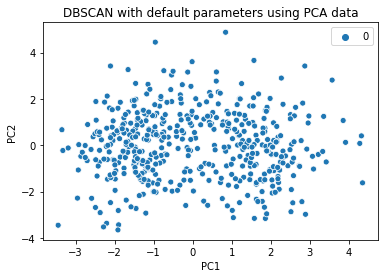

In [129]:
sns.scatterplot(X_scale_pca_euclidean[default_euclidean_labels !=-1,0],
                X_scale_pca_euclidean[default_euclidean_labels !=-1,1],
                hue= default_euclidean_labels[default_euclidean_labels!=-1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('DBSCAN with default parameters using PCA data')

## DBSCAN with manhattan

In [130]:
dbscan_manhattan_pipe=Pipeline([('preprocessor',preprocessor),
                                ('pca',PCA(n_components=2)),
                                ('dbscan',DBSCAN(eps=1.6, min_samples=5,metric='manhattan'))])

In [131]:
dbscan_manhattan_pipe.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Account length',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                         

In [132]:
dbscan_manhattan_pipe[-1].labels_

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [133]:
default_manhattan_labels=dbscan_manhattan_pipe[-1].labels_

In [134]:
silhouette_score(X_2, dbscan_manhattan_pipe[-1].labels_,metric='manhattan')

0.22282988884047605

In [135]:
X_scale_pca_manhattan=dbscan_manhattan_pipe[:-1].transform(X)

Text(0.5, 1.0, 'DBSCAN with manhattan parameters using PCA data')

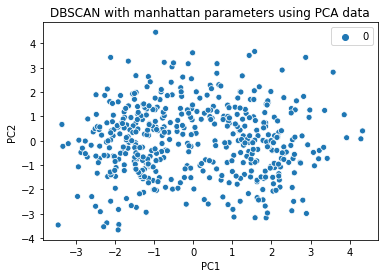

In [136]:
sns.scatterplot(X_scale_pca_manhattan[default_manhattan_labels !=-1,0],
                X_scale_pca_manhattan[default_manhattan_labels !=-1,1],
                hue= default_manhattan_labels[default_manhattan_labels!=-1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('DBSCAN with manhattan parameters using PCA data')

## Hierachical Clustering

In [137]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [138]:
linkage_list=['ward','complete','average','single']

In [139]:
hi_pipe_list=[]

for linkage_type in linkage_list:
  hi_loop_pipe=Pipeline([('preprocessor',preprocessor),
                          ('pca',PCA(n_components=.8)),
                        ('hc',AgglomerativeClustering(linkage=linkage_type))])
  hi_loop_pipe.fit(X)

  hi_pipe_list.append(hi_loop_pipe)

In [140]:

hi_label_list=[pipe.named_steps['hc'].labels_ for pipe in hi_pipe_list]

In [141]:
hi_score_list=[silhouette_score(X_2, label, metric='euclidean') for label in hi_label_list]

In [142]:
X_scale=hi_pipe_list[0][:-1].transform(X)

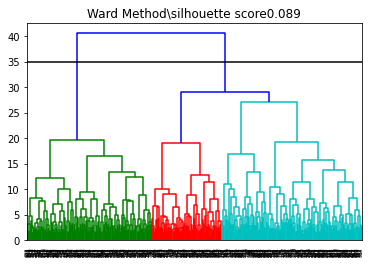

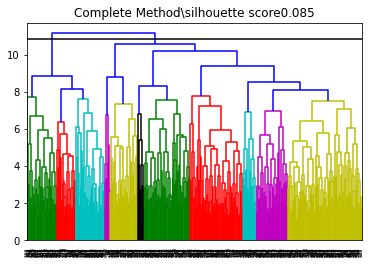

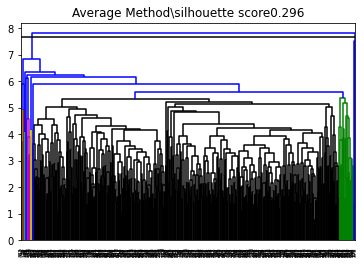

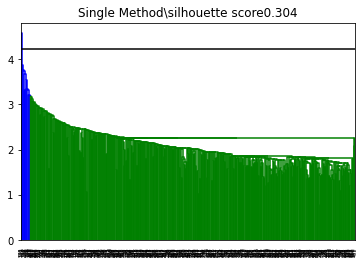

In [143]:
for linkage_type, score in zip(linkage_list, hi_score_list):
    #calcluate the linakges
    loop_links=linkage(X_scale, method=linkage_type)
    
    #plotting the dendrogram
    dendrogram(loop_links)
    plt.axhline(loop_links[-2:,2].mean(),color='k')
    plt.title(f'{linkage_type.capitalize()} Method\silhouette score{score:.3f}')
    plt.show()

In [144]:
hi_loop_pipe_final=Pipeline([('preprocessor',preprocessor),
                          ('pca',PCA(n_components=.8)),
                        ('hc',AgglomerativeClustering(linkage='single'))])

In [145]:
hi_loop_pipe_final.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Account length',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total eve minutes',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                         

In [146]:
hi_loop_pipe_final[-1].labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [147]:
df_true['hi_labels']=hi_loop_pipe_final[-1].labels_
df_true.head()

/home/gamma/Desktop/unit3_project/unit3_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


State  Account length  Area code International plan Voice mail plan  \
18    CO              77        408                 No              No   
28    AZ              12        408                 No              No   
35    MD             135        408                Yes             Yes   
45    WY              87        415                 No              No   
48    CO             121        408                 No             Yes   

    Number vmail messages  Total day minutes  Total day calls  \
18                      0               62.4               89   
28                      0              249.6              118   
35                     41              173.1               85   
45                      0              151.0               83   
48                     30              198.4              129   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
18             10.61              169.9              121             14.44   
28             42.43              252.4              119             21.45   
35             29.43              203.9              107             17.33   
45             25.67              219.7              116             18.67   
48             33.73               75.3               77              6.40   

    Total night minutes  Total night calls  Total night charge  \
18                209.6                 64                9.43   
28                280.2                 90               12.61   
35                122.2                 78                5.50   
45                203.9                127                9.18   
48                181.2                 77                8.15   

    Total intl minutes  Total intl calls  Total intl charge  \
18                 5.7                 6               1.54   
28                11.8                 3               3.19   
35                14.6                15               3.94   
45                 9.7                 3               2.62   
48                 5.8                 3               1.57   

    Customer service calls  Churn  kmeans_labels  dbscan_labels  hi_labels  
18                       5   True              2              0          0  
28                       1   True              1              0          0  
35                       0   True              0              0          0  
45                       5   True              2              0          0  
48                       3   True              2              0          0

In [148]:
#silhouette score
df_true.groupby('hi_labels').describe()

Account length                                                   \
                   count        mean        std   min   25%    50%    75%   
hi_labels                                                                   
0                  482.0  102.674274  39.508252   1.0  76.0  103.0  127.0   
1                    1.0   98.000000        NaN  98.0  98.0   98.0   98.0   

                 Area code                                                     \
             max     count        mean        std    min    25%    50%    75%   
hi_labels                                                                       
0          225.0     482.0  437.865145  42.824067  408.0  408.0  415.0  510.0   
1           98.0       1.0  415.000000        NaN  415.0  415.0  415.0  415.0   

                 Number vmail messages                                      \
             max                 count      mean        std  min  25%  50%   
hi_labels                                                                    
0          510.0                 482.0  5.126556  11.870164  0.0  0.0  0.0   
1          415.0                   1.0  0.000000        NaN  0.0  0.0  0.0   

                     Total day minutes                                       \
           75%   max             count        mean        std   min     25%   
hi_labels                                                                     
0          0.0  48.0             482.0  207.343361  68.420749  46.5  153.45   
1          0.0   0.0               1.0    0.000000        NaN   0.0    0.00   

                                 Total day calls                               \
             50%      75%    max           count        mean        std   min   
hi_labels                                                                       
0          217.7  265.975  350.8           482.0  101.545643  21.103817  42.0   
1            0.0    0.000    0.0             1.0    0.000000        NaN   0.0   

                                      Total day charge                     \
            25%    50%     75%    max            count     mean       std   
hi_labels                                                                   
0          88.0  103.0  116.75  165.0            482.0  35.2489  11.63161   
1           0.0    0.0    0.00    0.0              1.0   0.0000       NaN   

                                               Total eve minutes             \
            min      25%    50%     75%    max             count       mean   
hi_labels                                                                     
0          7.91  26.0875  37.01  45.215  59.64             482.0  212.51971   
1          0.00   0.0000   0.00   0.000   0.00               1.0  159.60000   

                                                          Total eve calls  \
                 std    min    25%    50%      75%    max           count   
hi_labels                                                                   
0          51.726522   70.9  177.5  211.3  249.475  363.7           482.0   
1                NaN  159.6  159.6  159.6  159.600  159.6             1.0   

                                                                \
            mean        std    min    25%    50%    75%    max   
hi_labels                                                        
0          100.5  19.699431   48.0   87.0  101.0  114.0  168.0   
1          130.0        NaN  130.0  130.0  130.0  130.0  130.0   

          Total eve charge                                                     \
                     count       mean       std    min    25%    50%      75%   
hi_labels                                                                       
0                    482.0  18.064274  4.396567   6.03  15.09  17.96  21.2075   
1                      1.0  13.570000       NaN  13.57  13.57  13.57  13.5700   

                 Total night minutes                                       \
             max               count       

0. 
    * Account Length-102.67 -> longer accounts
    * Number vmail messages- 5.12 -> more messages
    * Total day minutes- 207.34 -> more day calls
    * Total day calls- 101.56
    * Total day charge- 35.25
    * Total eve minutes- 212.52-> longer evening calls
    * Total eve calls- 100.5
    * Total eve charge- 18.06
    * Total night minutes: 205.31 -> longer night calls
    * Total night calls: 100.43
    * Total night charge: 9.24
    * Total international minutes: 10.71
    * Total international calls: 4.17
    * Total international charge: 2.89
    * Customer service calls: 2.22
    
    
1. 
    * Account Length-98.00
    * Number vmail messages- 0
    * Total day minutes- 0
    * Total day calls- 0
    * Total day charge- 0
    * Total eve minutes- 159.60
    * Total eve calls- 130. -> more evening calls
    * Total eve charge- 13.57
    * Total night minutes: 167.10
    * Total night calls: 88
    * Total night charge: 7.52
    * Total international minutes: 6.8
    * Total international calls: 1.0
    * Total international charge: 1.84
    * Customer service calls: 4.0 -> more customer services
